# HATLAS-SGP master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]
This notebook was executed on: 
2018-02-22 12:08:23.247050


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, quick_checks, find_last_ml_suffix

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "_20170718"

master_catalogue = Table.read("{}/master_catalogue_sgp_{}.fits".format(OUT_DIR, SUFFIX))
print('Using masterlist ' + "{}/master_catalogue_sgp_{}.fits".format(OUT_DIR, SUFFIX))

Using masterlist ./data/master_catalogue_sgp_20180221.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(160, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(160, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

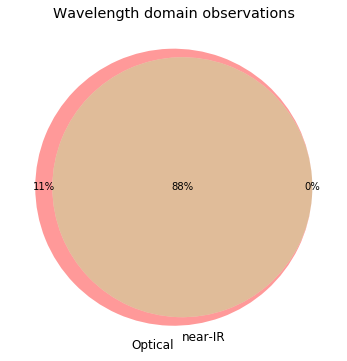

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

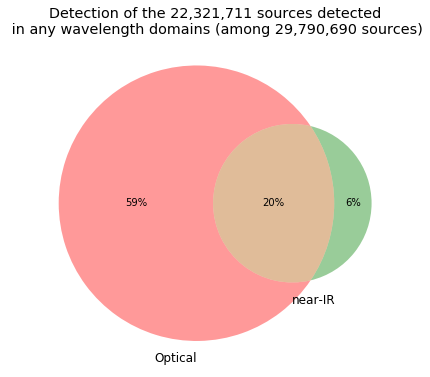

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["OmegaCAM u"]
g_bands = ["OmegaCAM g", "DECam g", "GPC1 g"]
r_bands = ["OmegaCAM r", "DECam r", "GPC1 r"]
i_bands = ["OmegaCAM i", "DECam i", "GPC1 i"]
z_bands = [              "DECam z", "GPC1 z", "VISTA z"]
y_bands = [              "DECam y", "GPC1 y", "VISTA y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

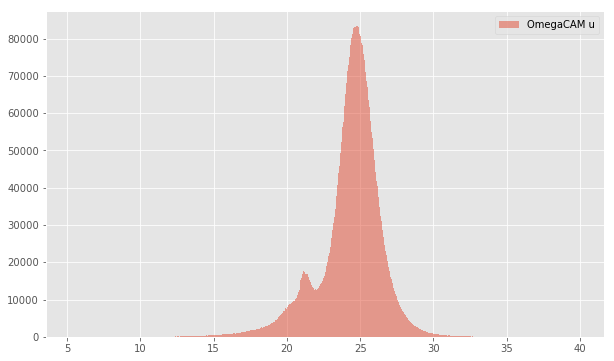

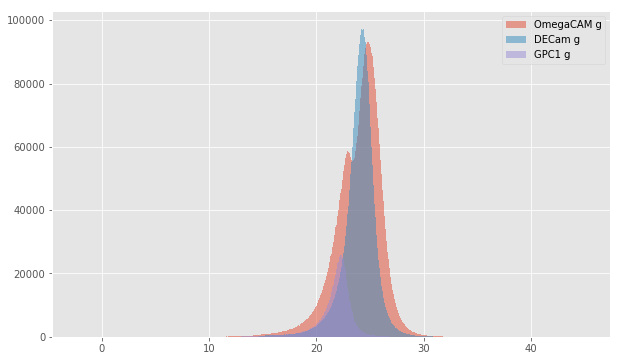

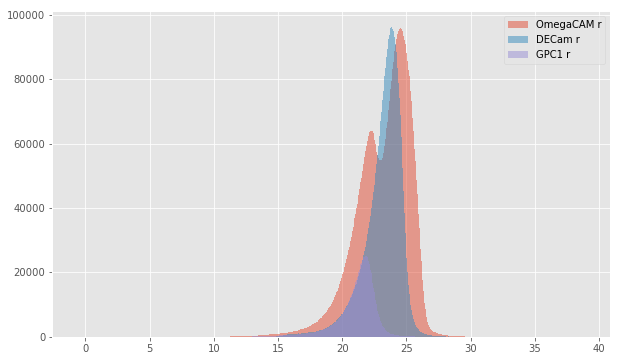

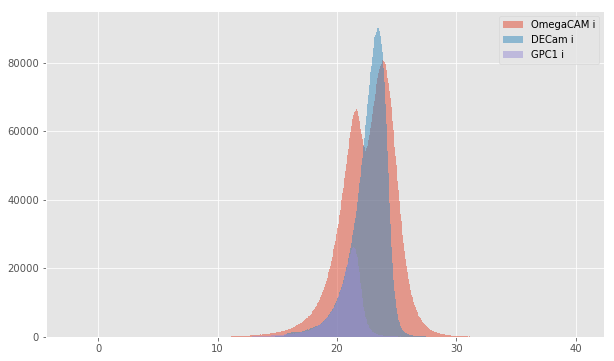

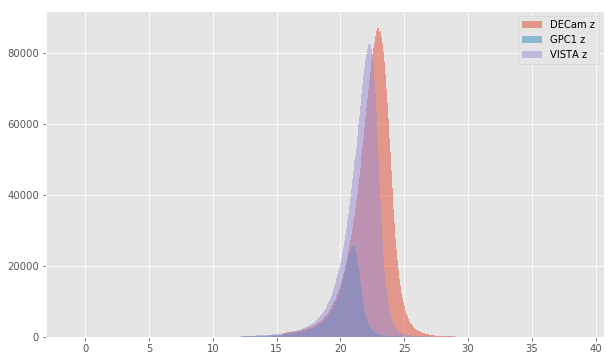

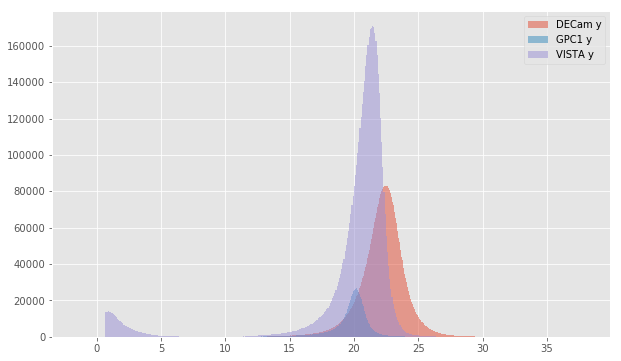

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

DECam g (aperture) - OmegaCAM g (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.09
- 1% percentile: -0.6474657525146481
- 99% percentile: 1.7280513825341686


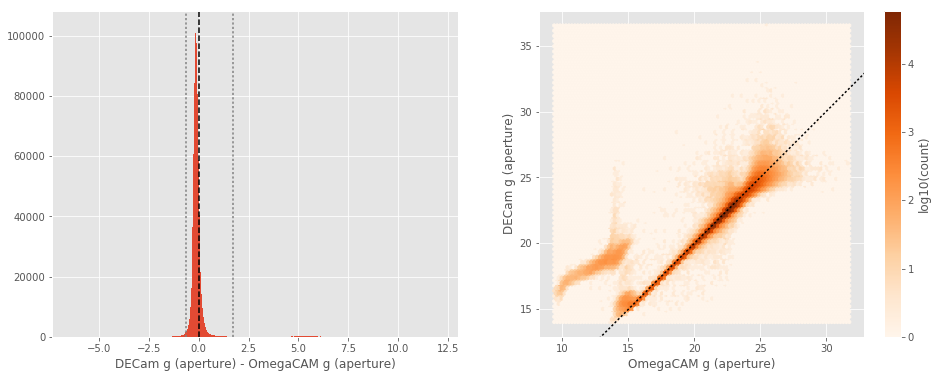

DECam g (total) - OmegaCAM g (total):
- Median: -0.09
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1961334181604002
- 99% percentile: 1.911162154801013


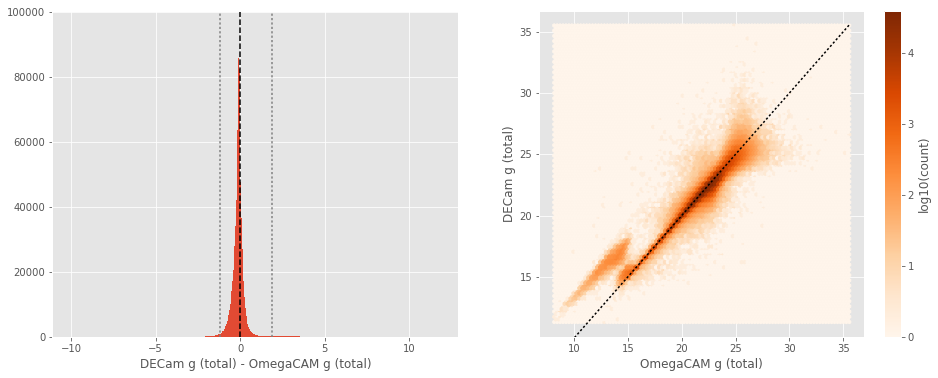

GPC1 g (aperture) - OmegaCAM g (aperture):
- Median: -0.31
- Median Absolute Deviation: 0.30
- 1% percentile: -1.6985355429382323
- 99% percentile: 1.8626549105468695


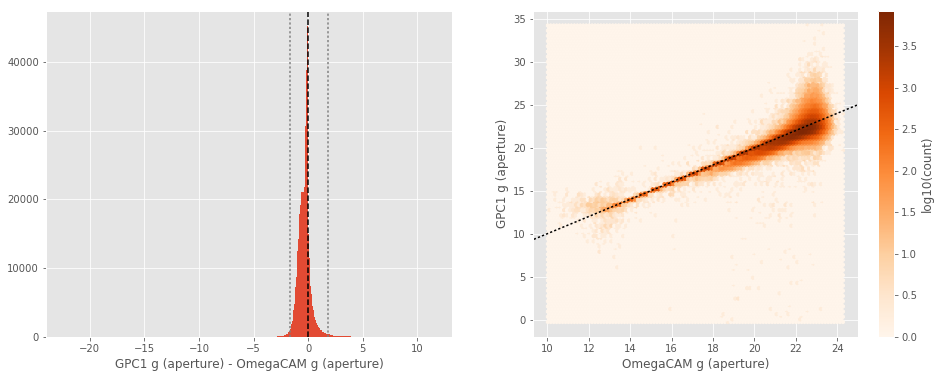

GPC1 g (total) - OmegaCAM g (total):
- Median: -0.05
- Median Absolute Deviation: 0.21
- 1% percentile: -1.6923736712036148
- 99% percentile: 1.458908375190431


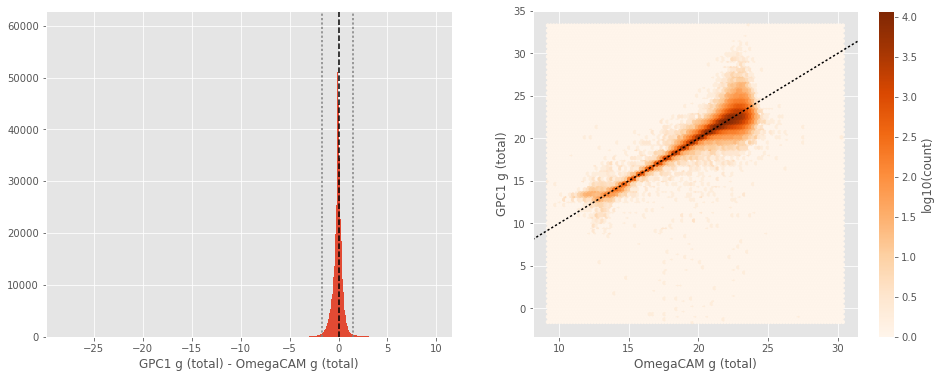

GPC1 g (aperture) - DECam g (aperture):
- Median: -0.34
- Median Absolute Deviation: 0.42
- 1% percentile: -3.4275997161865233
- 99% percentile: 2.2799744033813365


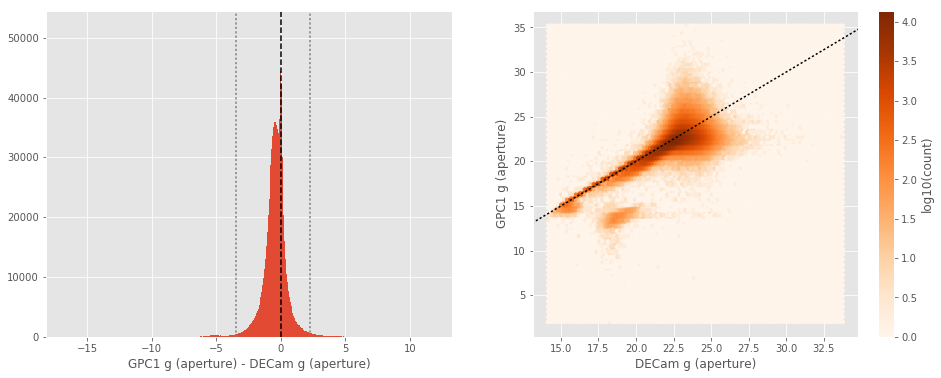

GPC1 g (total) - DECam g (total):
- Median: -0.01
- Median Absolute Deviation: 0.27
- 1% percentile: -3.1576532745361328
- 99% percentile: 1.866502609252933


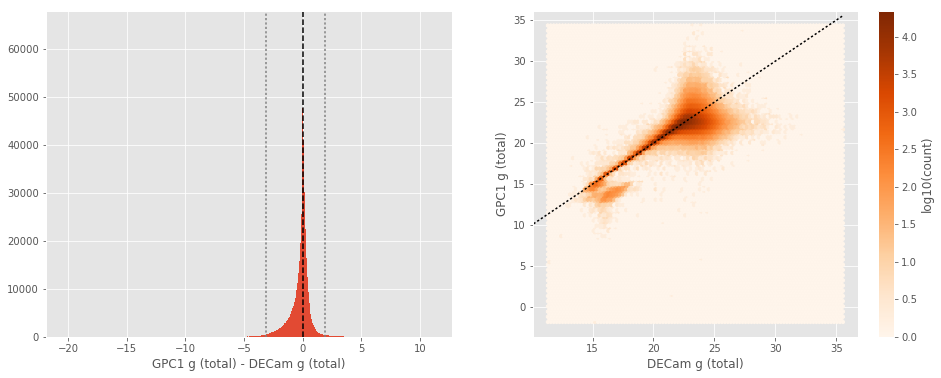

DECam r (aperture) - OmegaCAM r (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.08
- 1% percentile: -0.5350769778564463
- 99% percentile: 4.866558053847657


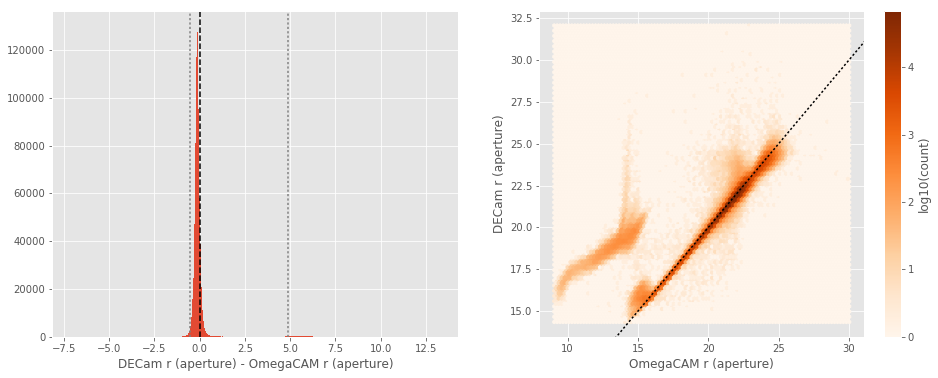

DECam r (total) - OmegaCAM r (total):
- Median: -0.11
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0471889911657721
- 99% percentile: 2.6142222210803214


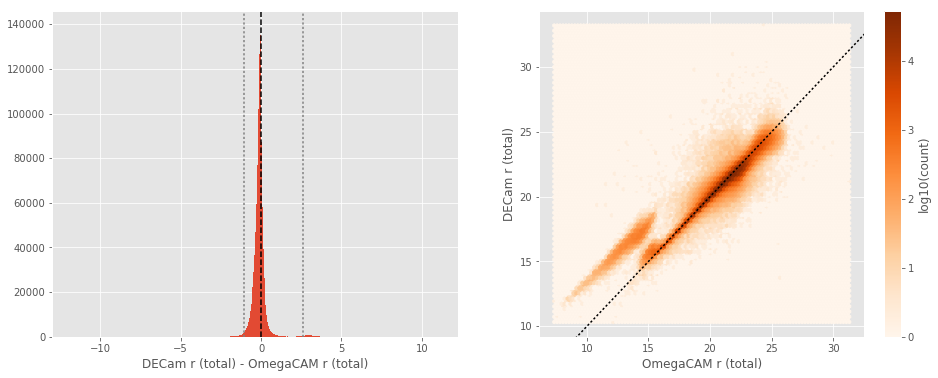

GPC1 r (aperture) - OmegaCAM r (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.24
- 1% percentile: -1.1908159821044926
- 99% percentile: 1.3593329190185526


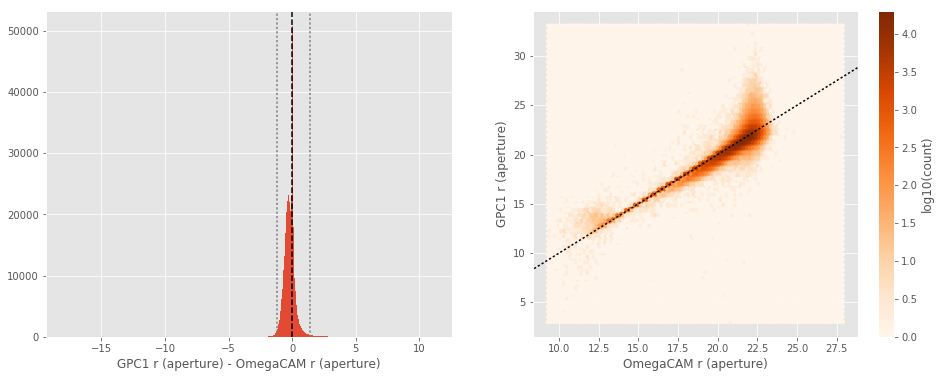

GPC1 r (total) - OmegaCAM r (total):
- Median: 0.09
- Median Absolute Deviation: 0.17
- 1% percentile: -1.208804918706055
- 99% percentile: 1.2806788397802757


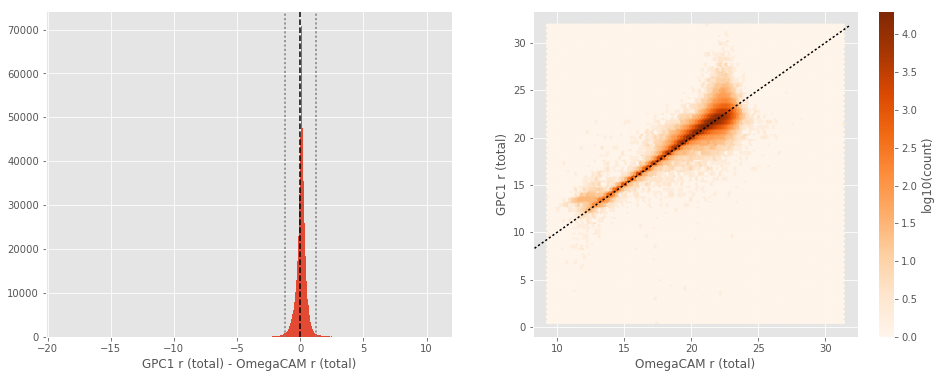

GPC1 r (aperture) - DECam r (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.29
- 1% percentile: -2.9000253677368164
- 99% percentile: 1.7319810867309582


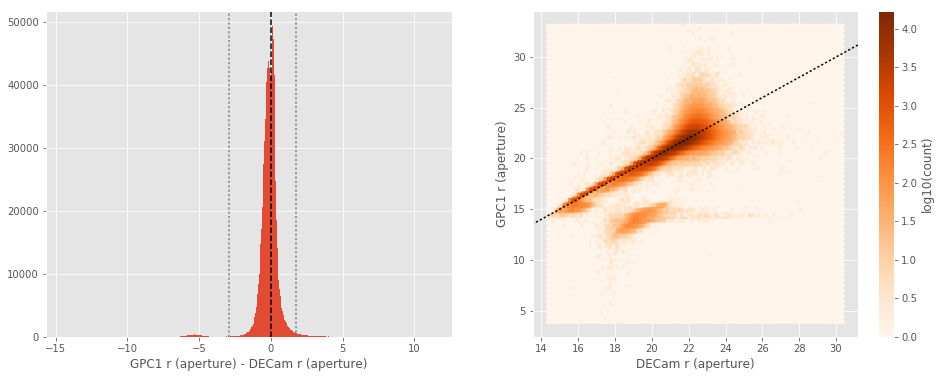

GPC1 r (total) - DECam r (total):
- Median: 0.18
- Median Absolute Deviation: 0.16
- 1% percentile: -2.408263292312622
- 99% percentile: 1.4619639968872113


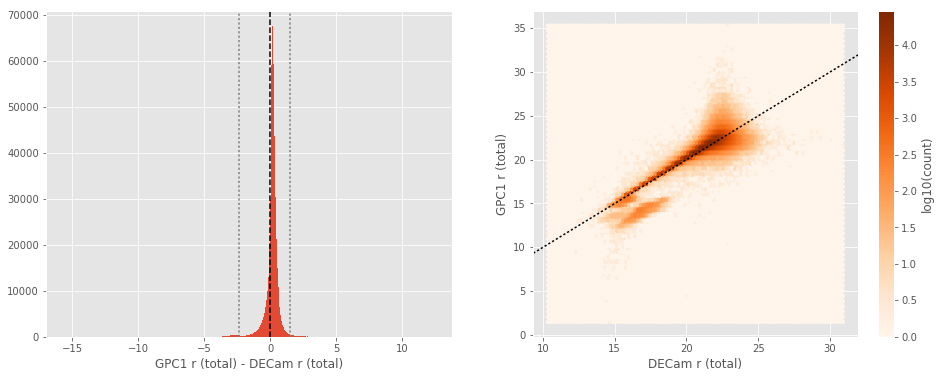

DECam i (aperture) - OmegaCAM i (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.09
- 1% percentile: -0.6352793884277345
- 99% percentile: 5.6036114701904385


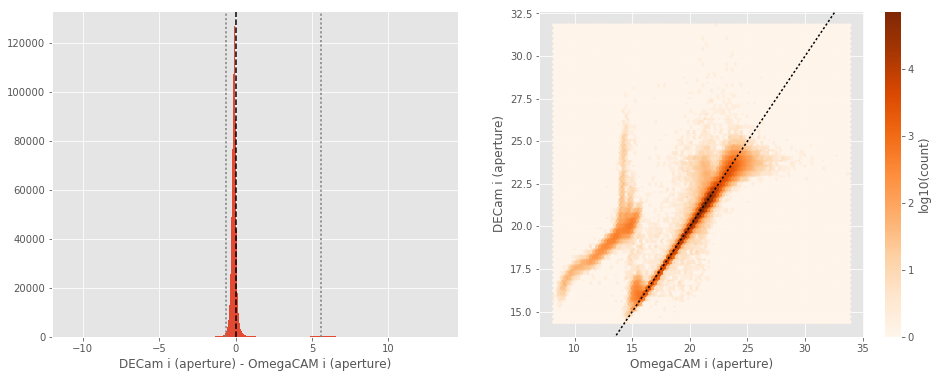

DECam i (total) - OmegaCAM i (total):
- Median: -0.13
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1535859961669928
- 99% percentile: 3.1698317788012687


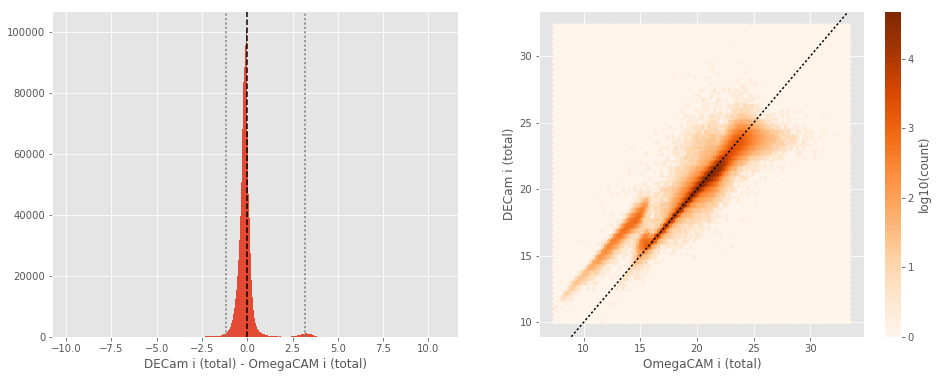

GPC1 i (aperture) - OmegaCAM i (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.20
- 1% percentile: -1.0411629385571295
- 99% percentile: 0.684708058386228


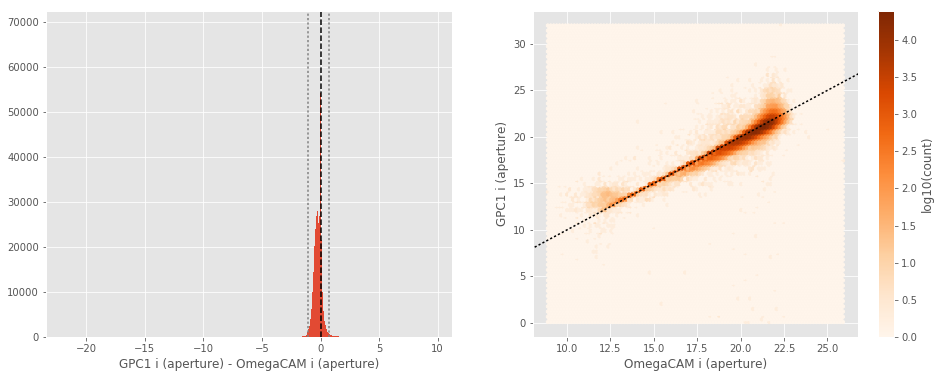

GPC1 i (total) - OmegaCAM i (total):
- Median: 0.06
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8757926416992193
- 99% percentile: 0.8245664915612798


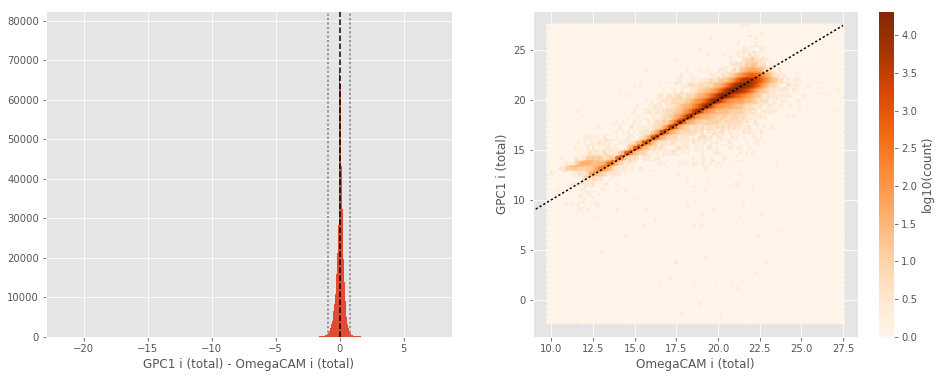

GPC1 i (aperture) - DECam i (aperture):
- Median: -0.12
- Median Absolute Deviation: 0.24
- 1% percentile: -5.175756340026855
- 99% percentile: 0.8781820678710961


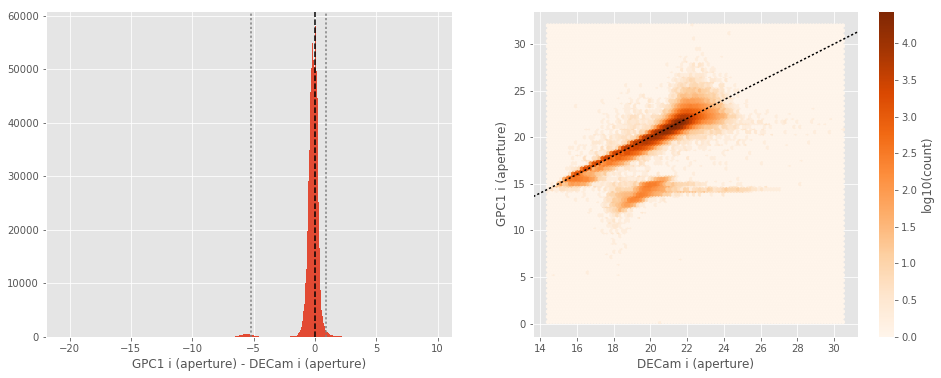

GPC1 i (total) - DECam i (total):
- Median: 0.17
- Median Absolute Deviation: 0.10
- 1% percentile: -2.857390022277832
- 99% percentile: 0.7871204376220695


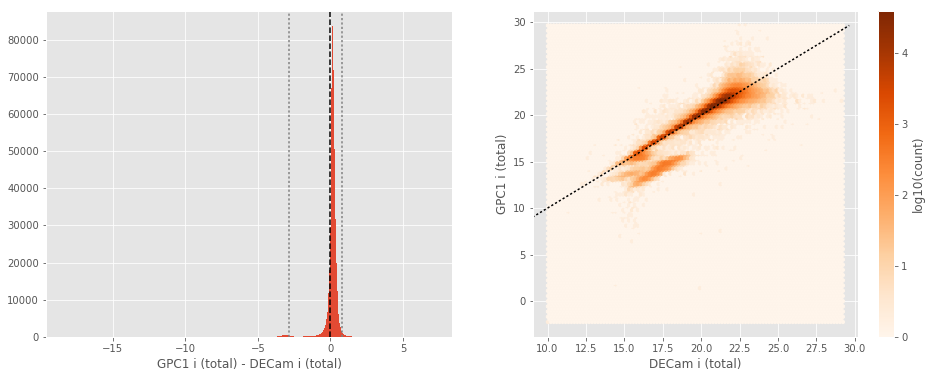

GPC1 z (aperture) - DECam z (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.27
- 1% percentile: -5.1973347663879395
- 99% percentile: 1.5240682601928692


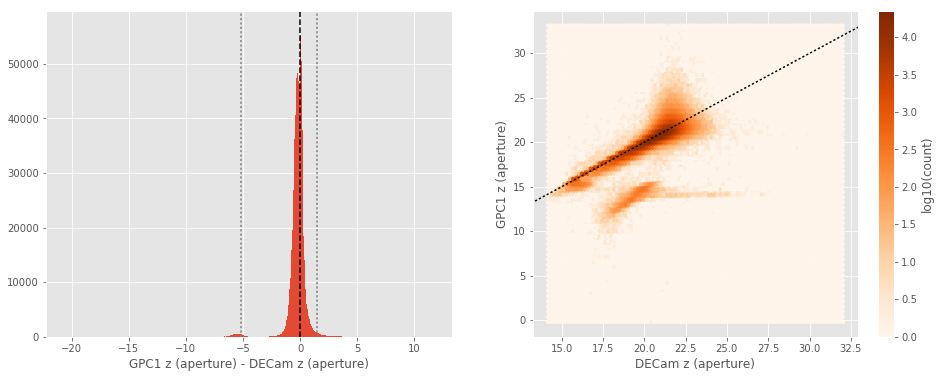

GPC1 z (total) - DECam z (total):
- Median: 0.17
- Median Absolute Deviation: 0.14
- 1% percentile: -2.8264899253845215
- 99% percentile: 1.3064206695556635


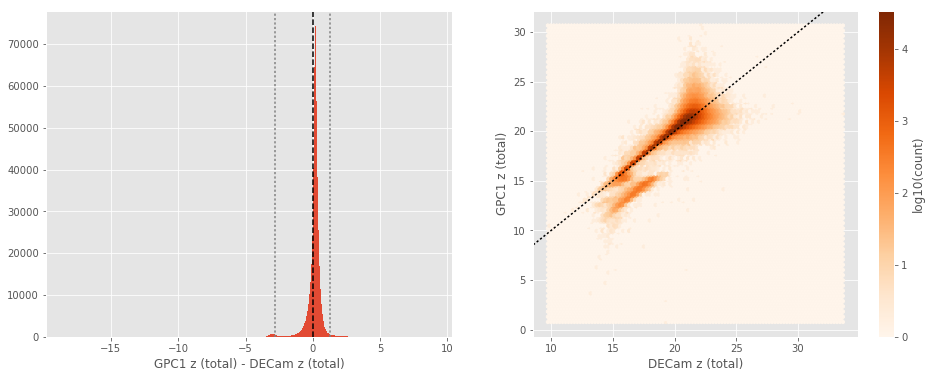

VISTA z (aperture) - DECam z (aperture):
- Median: 0.02
- Median Absolute Deviation: 0.10
- 1% percentile: -1.0295980072021484
- 99% percentile: 0.5161357307434082


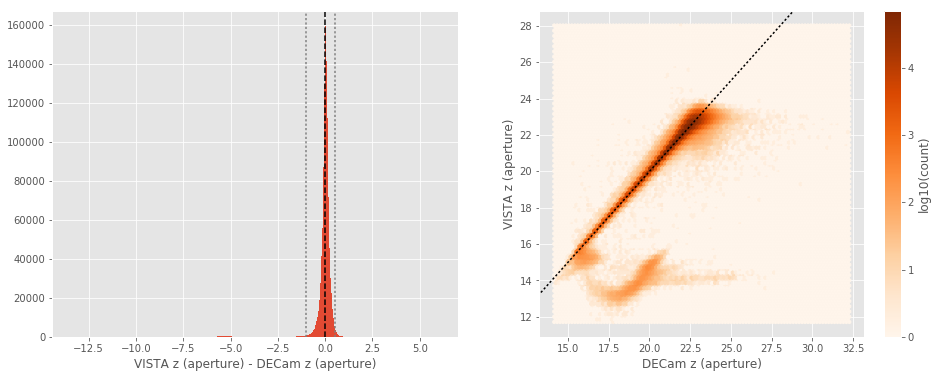

VISTA z (total) - DECam z (total):
- Median: 0.02
- Median Absolute Deviation: 0.20
- 1% percentile: -1.8286405181884766
- 99% percentile: 1.2542409133911105


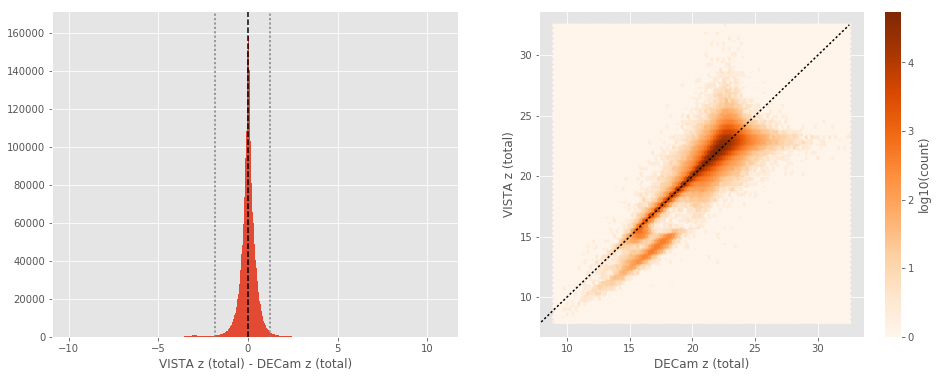

VISTA z (aperture) - GPC1 z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.24
- 1% percentile: -1.5340843200683594
- 99% percentile: 1.2795259094238238


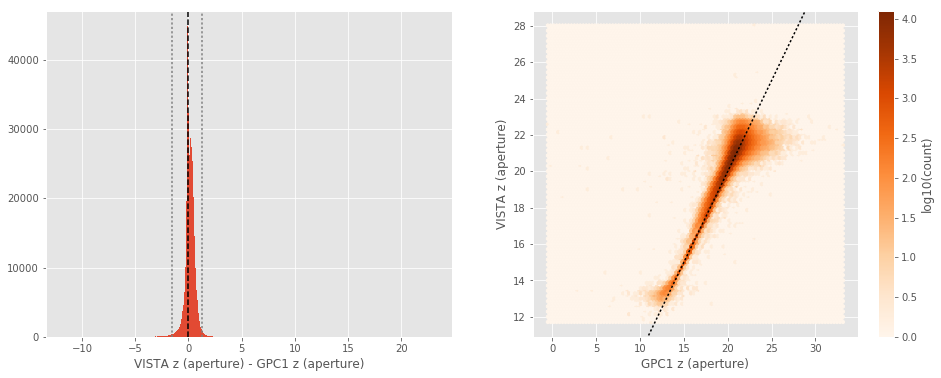

VISTA z (total) - GPC1 z (total):
- Median: -0.17
- Median Absolute Deviation: 0.18
- 1% percentile: -1.5516764831542968
- 99% percentile: 1.3785708236694343


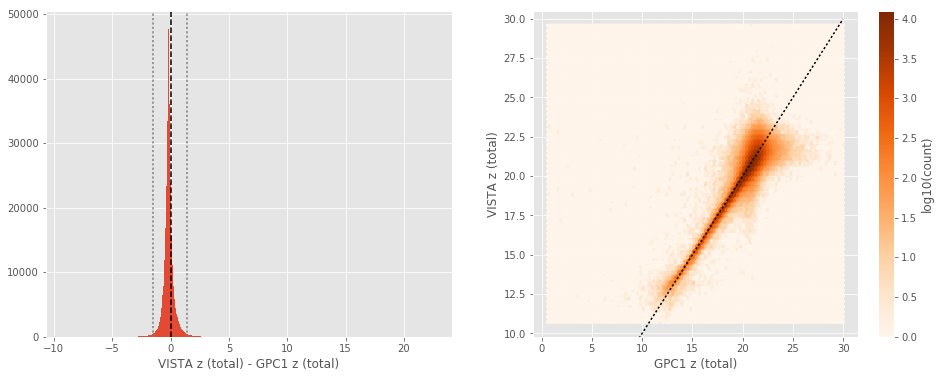

GPC1 y (aperture) - DECam y (aperture):
- Median: -0.39
- Median Absolute Deviation: 0.38
- 1% percentile: -2.618603858947754
- 99% percentile: 1.9402295494079576


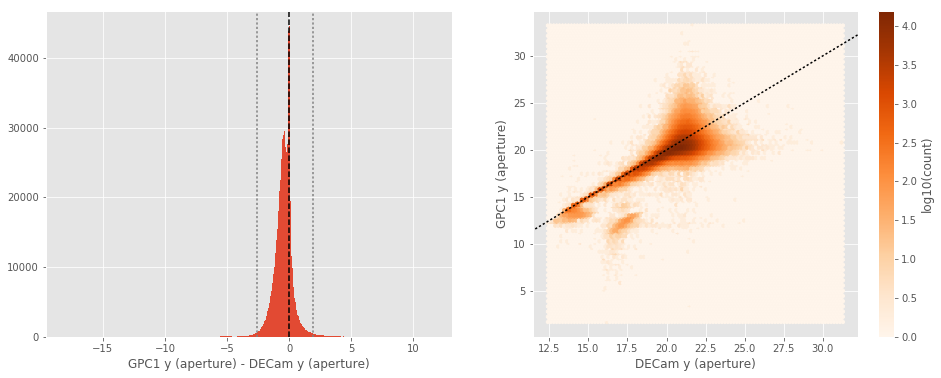

GPC1 y (total) - DECam y (total):
- Median: 0.01
- Median Absolute Deviation: 0.32
- 1% percentile: -2.71594123840332
- 99% percentile: 1.8680044174194355


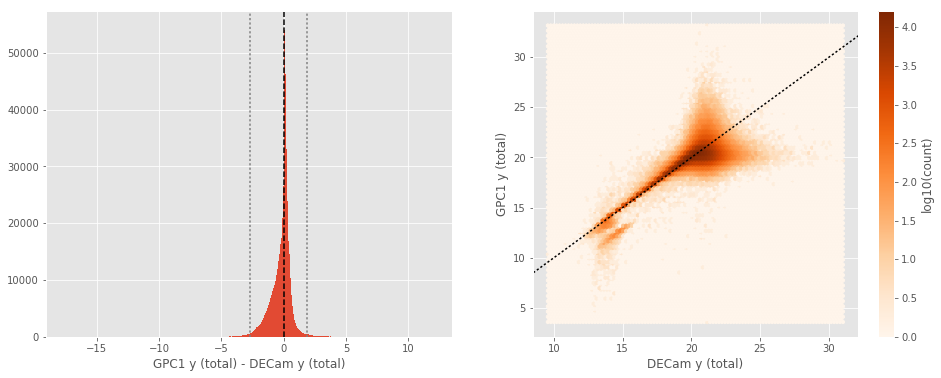

VISTA y (aperture) - DECam y (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.11
- 1% percentile: -1.256957778930664
- 99% percentile: 0.41260734558105483


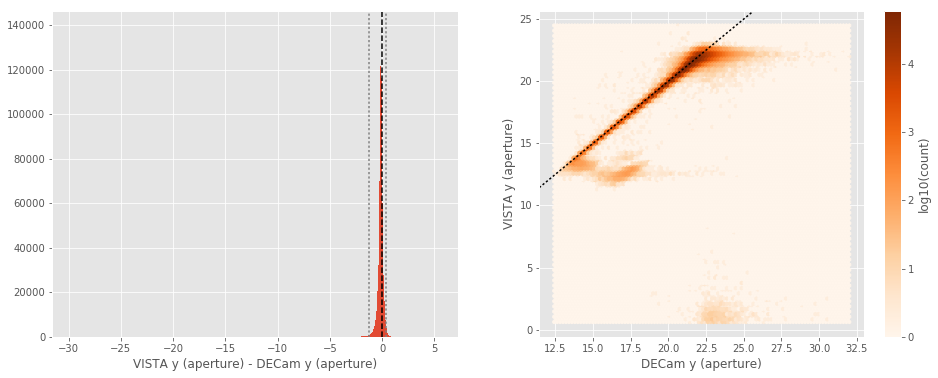

VISTA y (total) - DECam y (total):
- Median: -0.12
- Median Absolute Deviation: 0.20
- 1% percentile: -1.913156509399414
- 99% percentile: 1.2057640457153322


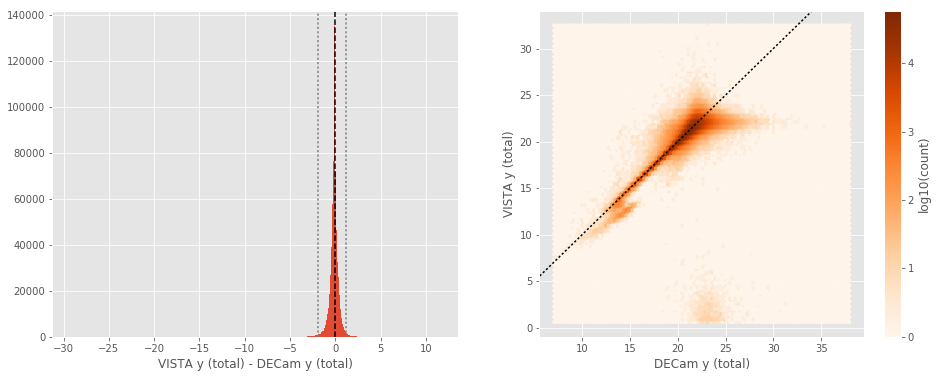

VISTA y (aperture) - GPC1 y (aperture):
- Median: 0.23
- Median Absolute Deviation: 0.35
- 1% percentile: -2.10777437210083
- 99% percentile: 2.065537281036377


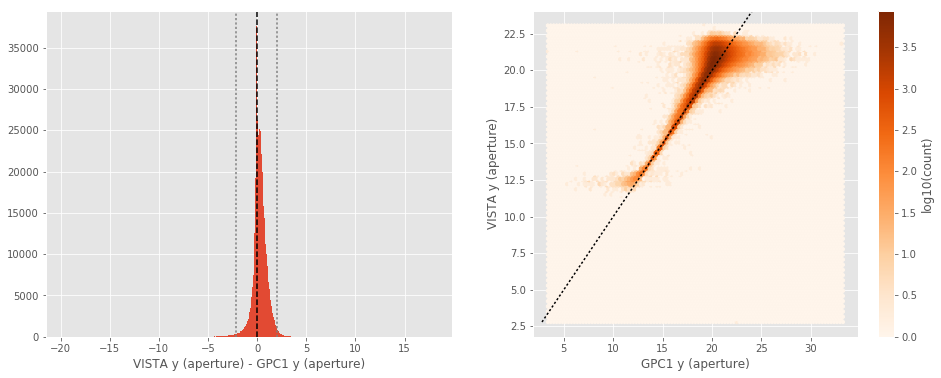

VISTA y (total) - GPC1 y (total):
- Median: -0.13
- Median Absolute Deviation: 0.33
- 1% percentile: -2.086603355407715
- 99% percentile: 2.3443342590332037


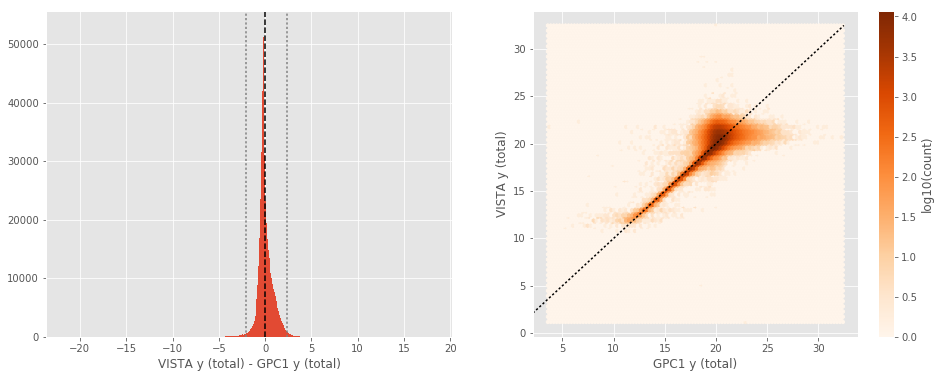

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the VISTA total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, VISTA uses a Ks band.

In [12]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [13]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_HATLAS-SGP.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

VISTA J (total) - 2MASS J:
- Median: 0.03
- Median Absolute Deviation: 0.07
- 1% percentile: -1.1194814927579704
- 99% percentile: 1.150870347451982


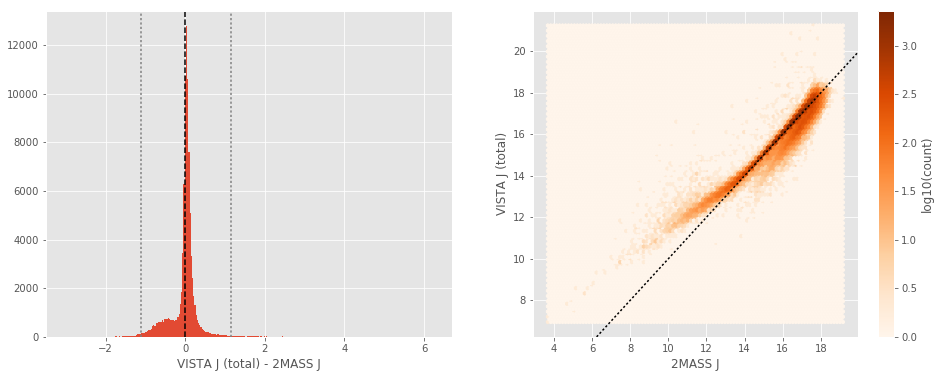

In [14]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks-like (total) - 2MASS Ks:
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0640412553270873
- 99% percentile: 1.1824742867413949


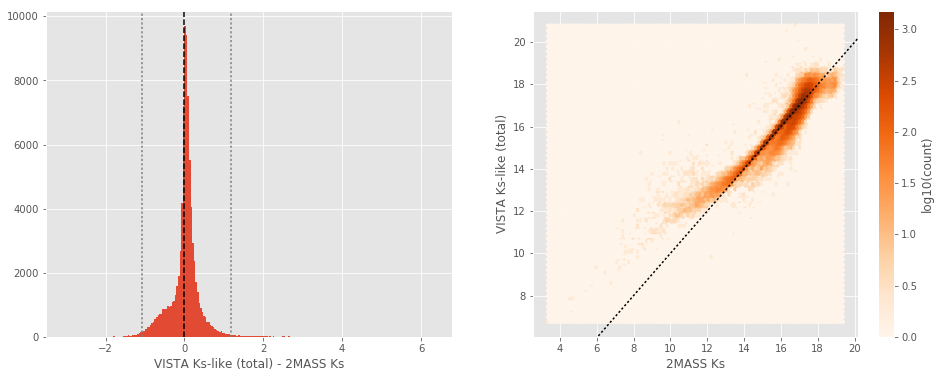

In [15]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vista_ks'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks-like (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 12930467 / 29790690 (43.40%)


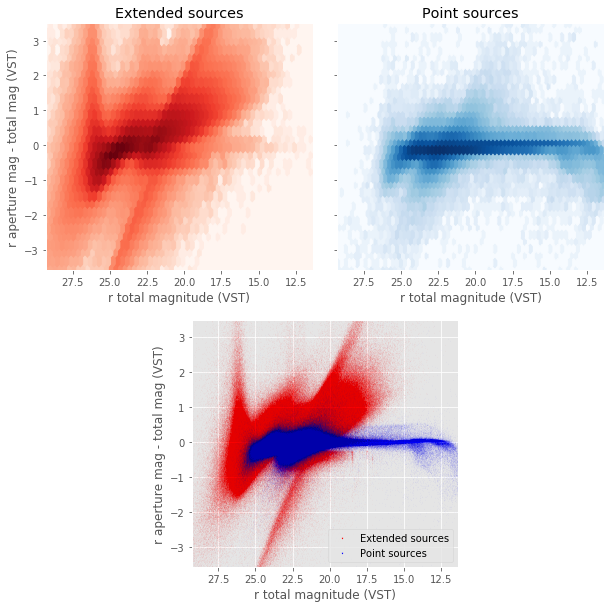

In [16]:
nb_ccplots(
    master_catalogue['m_omegacam_r'],
    master_catalogue['m_ap_omegacam_r'] - master_catalogue['m_omegacam_r'],
    "r total magnitude (VST)", "r aperture mag - total mag (VST)",
    master_catalogue["stellarity"],
    invert_x=True
)

Number of source used: 994579 / 29790690 (3.34%)


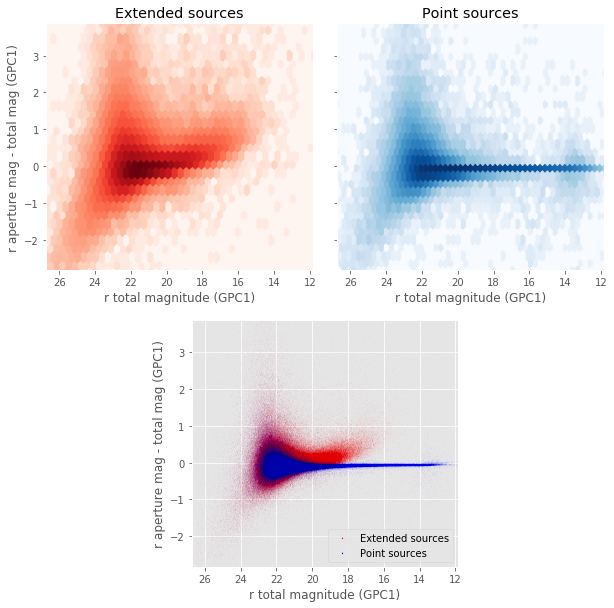

In [17]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 1863979 / 29790690 (6.26%)


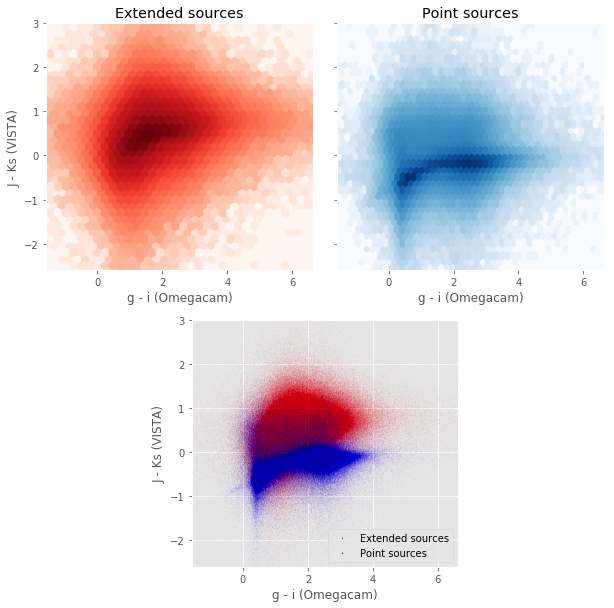

In [18]:
nb_ccplots(
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_i'],
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    "g - i (Omegacam)", "J - Ks (VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 376927 / 29790690 (1.27%)


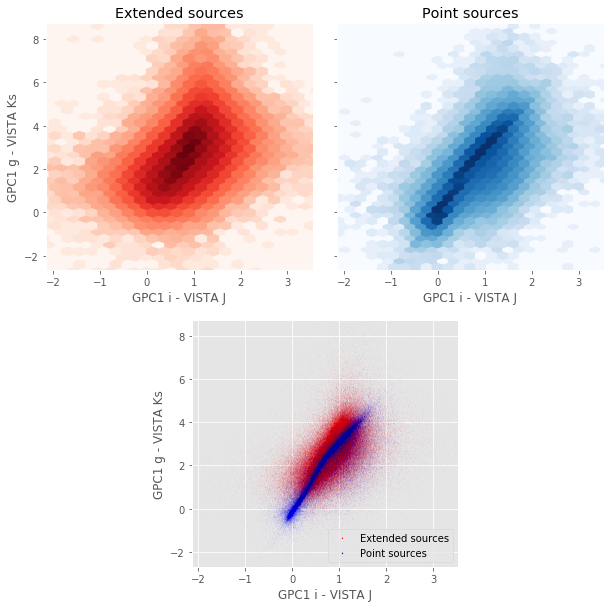

In [19]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_vista_j'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_vista_ks'],
    "GPC1 i - VISTA J", "GPC1 g - VISTA Ks",
    master_catalogue["stellarity"]
)

Number of source used: 6640916 / 29790690 (22.29%)


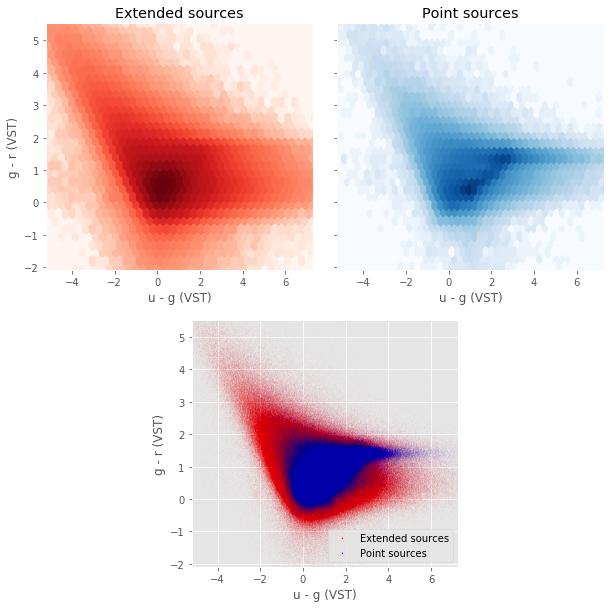

In [20]:
nb_ccplots(
    master_catalogue['m_omegacam_u'] - master_catalogue['m_omegacam_g'],
    master_catalogue['m_omegacam_g'] - master_catalogue['m_omegacam_r'],
    "u - g (VST)", "g - r (VST)",
    master_catalogue["stellarity"]
)

Number of source used: 376927 / 29790690 (1.27%)


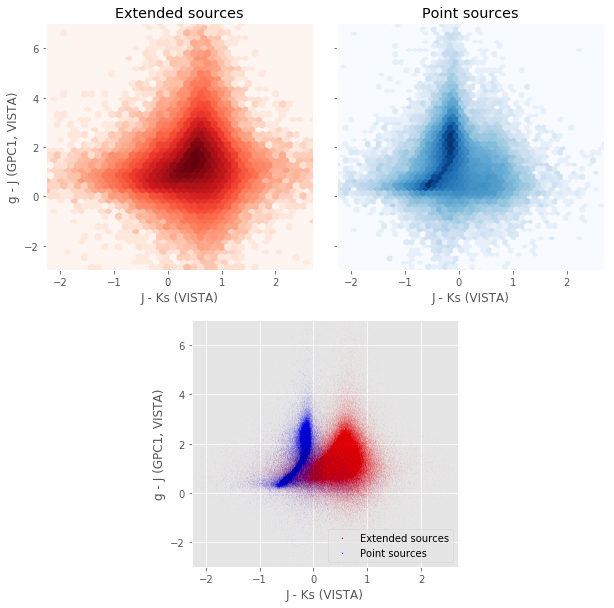

In [21]:
nb_ccplots(
    master_catalogue['m_vista_j'] - master_catalogue['m_vista_ks'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "J - Ks (VISTA)", "g - J (GPC1, VISTA)",
    master_catalogue["stellarity"]
)

Number of source used: 520388 / 29790690 (1.75%)


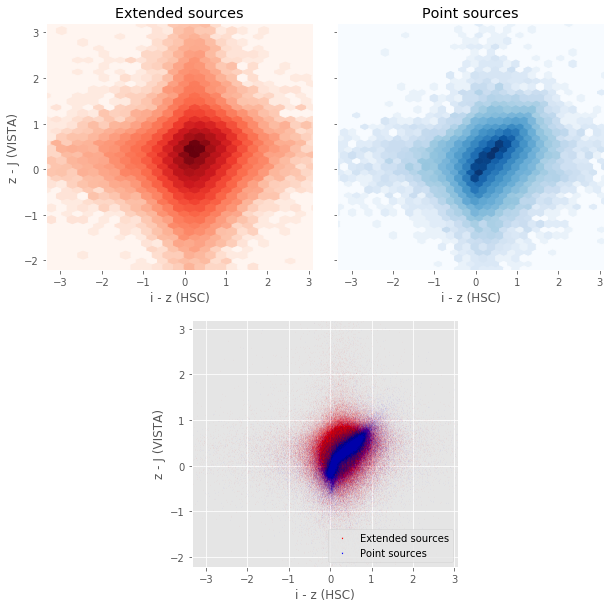

In [22]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_vista_z'] - master_catalogue['m_vista_j'],
    "i - z (HSC)", "z - J (VISTA)",
    master_catalogue["stellarity"]
)